<center><h1>Activity - 5 </h1>
<center><h2>Linear Regression

<h2>1. Load the dataset and perform following pre-processing tasks: [4 pts]

In [1]:
# Importing libraries
import numpy as np     # used for handling number
import pandas as pd    # used for handling dataset
 
import warnings as wg         # To ignore the warnings
wg.filterwarnings('ignore')

In [3]:
#Loading the dataset
df = pd.read_csv('popularity.csv')
df

,Unnamed: 0,avg_shares,avg_comments,avg_expert,popularity_score
0,19,147.3,23.9,19.1,14.6
1,91,28.6,1.5,33.0,7.3
2,166,17.9,37.6,21.6,8.0
3,196,94.2,4.9,8.1,9.7
4,42,293.6,27.7,1.8,20.7
...,...,...,...,...,...
195,155,4.1,11.6,5.7,3.2
196,80,76.4,26.7,22.3,11.8
197,181,218.5,5.4,27.4,12.2
198,145,140.3,1.9,9.0,10.3


<h2>1.1 Remove the first column of ‘Unnamed: 0’

In [4]:
del df['Unnamed: 0']
df

,avg_shares,avg_comments,avg_expert,popularity_score
0,147.3,23.9,19.1,14.6
1,28.6,1.5,33.0,7.3
2,17.9,37.6,21.6,8.0
3,94.2,4.9,8.1,9.7
4,293.6,27.7,1.8,20.7
...,...,...,...,...
195,4.1,11.6,5.7,3.2
196,76.4,26.7,22.3,11.8
197,218.5,5.4,27.4,12.2
198,140.3,1.9,9.0,10.3


## 1.2 Detect missing values, and replace them with the mean.

In [5]:
# checking for missing values
df.isnull()

,avg_shares,avg_comments,avg_expert,popularity_score
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [6]:
df[7:22]  # observe Nan in 7th entry and 19th entry

,avg_shares,avg_comments,avg_expert,popularity_score
7,168.4,NaN,12.8,11.7
8,280.2,10.1,21.4,14.8
9,19.4,16.0,22.3,6.6
10,107.4,14.0,10.9,11.5
11,177.0,9.3,6.4,12.8
12,296.4,36.3,100.9,23.8
13,237.4,27.5,11.0,18.9
14,232.1,8.6,8.7,13.4
15,206.9,8.4,26.4,12.9
16,131.1,42.8,28.9,18.0


In [9]:
from sklearn.impute import SimpleImputer   # used for handling missing data
from sklearn.model_selection import train_test_split  # used for spliting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scalling

In [10]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
X = df.iloc[:, 0:4].values   
imputer = imputer.fit(X[:, 0:4])
X[:, 0:4] = imputer.transform(X[:, 0:4])

In [11]:
df[7:20]          # notice now NaN vales of 7th and 19th row are filled with mean

,avg_shares,avg_comments,avg_expert,popularity_score
7,168.400000,23.319388,12.8,11.7
8,280.200000,10.100000,21.4,14.8
9,19.400000,16.000000,22.3,6.6
10,107.400000,14.000000,10.9,11.5
11,177.000000,9.300000,6.4,12.8
12,296.400000,36.300000,100.9,23.8
13,237.400000,27.500000,11.0,18.9
14,232.100000,8.600000,8.7,13.4
15,206.900000,8.400000,26.4,12.9
16,131.100000,42.800000,28.9,18.0


##     1.3 Draw box-plots for each attribute to detect if there are any outliers. If there are outliers, ignore them for now.


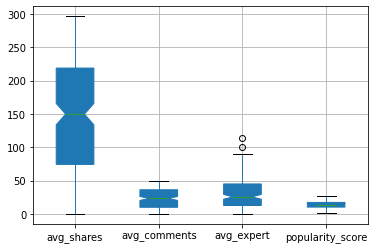

In [13]:
# Boxplot with outliers
 
boxplot = df.boxplot(column = ['avg_shares','avg_comments','avg_expert','popularity_score'],patch_artist = True,
                          notch ='True')

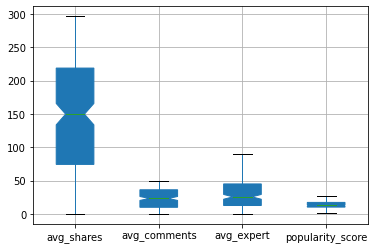

In [14]:
# Boxplot without outliers
 
boxplot = df.boxplot(column = ['avg_shares','avg_comments','avg_expert','popularity_score'],patch_artist = True,
                          notch ='True',showfliers=False)

## 1.4 Normalize all attributes within the range of 0 to 1.

###        The min max feature scaling 

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
 
ndf=pd.DataFrame(scaler.fit_transform(df),
            columns=df.columns, index=df.index) 
ndf

,avg_shares,avg_comments,avg_expert,popularity_score
0,0.495773,0.481855,0.165347,0.511811
1,0.094352,0.030242,0.287599,0.224409
2,0.058167,0.758065,0.187335,0.251969
3,0.316199,0.098790,0.068602,0.318898
4,0.990531,0.558468,0.013193,0.751969
...,...,...,...,...
195,0.011498,0.233871,0.047493,0.062992
196,0.256003,0.538306,0.193492,0.401575
197,0.736557,0.108871,0.238347,0.417323
198,0.472100,0.038306,0.076517,0.342520


## 2. Visualize through scatter plots the relationship of each attribute with the target attribute.

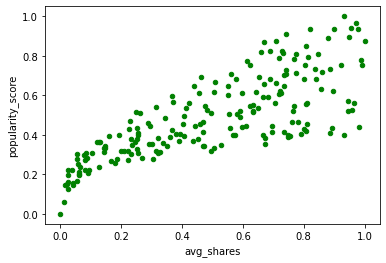

In [27]:
ax = ndf.plot.scatter(x = 'avg_shares', y = 'popularity_score', c= 'green')

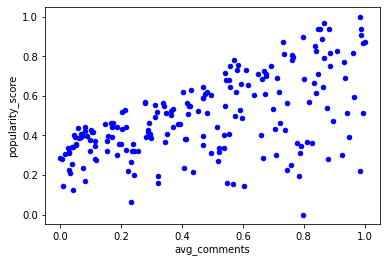

In [28]:
ax = ndf.plot.scatter(x = 'avg_comments', y = 'popularity_score', c= 'blue')

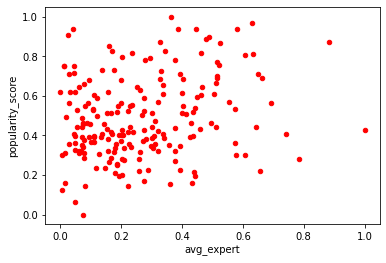

In [29]:
ax = ndf.plot.scatter(x = 'avg_expert', y = 'popularity_score', c= 'red')

<AxesSubplot:>

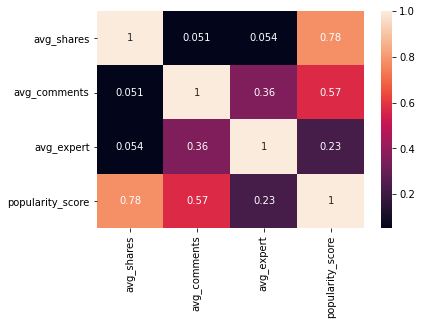

In [30]:
import seaborn as sn
corrMatrix = ndf.corr()
sn.heatmap(corrMatrix, annot=True)

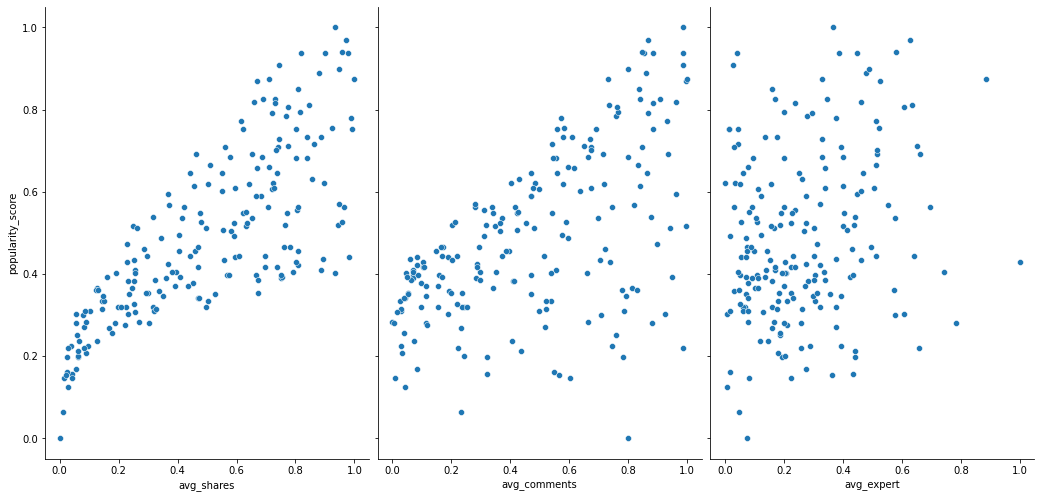

In [31]:
sn.pairplot(ndf, x_vars=['avg_shares','avg_comments','avg_expert'],y_vars='popularity_score', size=7, aspect=0.7)

<h2>3. Split the dataset into train and test, into 70% and 30% respectively. [1 pt]

In [32]:
features_col =['avg_shares','avg_comments','avg_expert']

X = ndf[features_col]
y = ndf.popularity_score

In [33]:
X_train, X_test,y_train,y_test  = train_test_split(X,y, test_size=0.3,random_state=42)

In [34]:
X_train

,avg_shares,avg_comments,avg_expert
169,0.622929,0.885081,0.012313
97,0.480893,0.590726,0.108179
31,0.837673,0.608871,0.175901
12,1.000000,0.731855,0.884785
35,0.393980,0.296371,0.044855
...,...,...,...
106,0.026716,0.042339,0.006157
14,0.782550,0.173387,0.073879
92,0.670950,0.616935,0.337731
179,0.256003,0.016129,0.127529


In [35]:
X_test

,avg_shares,avg_comments,avg_expert
95,0.148123,0.792339,0.394019
15,0.697328,0.169355,0.229551
30,0.321272,0.028226,0.062445
158,0.949273,0.798387,0.488127
128,0.104160,0.495968,0.016711
115,0.808590,0.082661,0.321900
69,0.160974,0.947581,0.072120
170,0.022320,0.566532,0.361478
174,0.078120,0.707661,0.576957
45,0.236388,0.470149,0.356201


In [36]:
y_train

169    0.751969
97     0.527559
31     0.732283
12     0.874016
35     0.405512
         ...   
106    0.125984
14     0.464567
92     0.657480
179    0.307087
102    0.570866
Name: popularity_score, Length: 140, dtype: float64

In [37]:
y_test

95     0.346457
15     0.444882
30     0.311024
158    0.897638
128    0.311024
115    0.421260
69     0.393701
170    0.153543
174    0.299213
45     0.350394
66     0.318898
182    0.393701
165    0.818898
78     0.547244
186    0.381890
177    0.393701
56     0.358268
152    0.661417
82     0.370079
68     0.783465
124    1.000000
16     0.645669
148    0.370079
93     0.728346
65     0.937008
60     0.354331
84     0.401575
67     0.629921
125    0.377953
132    0.874016
9      0.196850
18     0.665354
55     0.909449
75     0.405512
150    0.326772
104    0.444882
135    0.791339
137    0.551181
164    0.685039
76     0.732283
79     0.342520
197    0.417323
38     0.456693
24     0.515748
122    0.814961
195    0.062992
29     0.236220
19     0.318898
143    0.275591
86     0.547244
114    0.417323
173    0.385827
5      0.692913
126    0.562992
117    0.614173
73     0.334646
140    0.381890
98     0.515748
172    0.314961
96     0.771654
Name: popularity_score, dtype: float64

## 4. Train the linear regression model and print the coefficients (parameters) learned by the final model. [1 pt]

In [38]:
from sklearn.linear_model import LinearRegression
 
linreg = LinearRegression()
 
linreg.fit(X_train,y_train)

LinearRegression()

In [39]:
print(linreg.intercept_)
print(linreg.coef_)

0.05678179949574558
[ 0.53532068  0.34645074 -0.00081054]


In [40]:
y_pred = linreg.predict(X_test)

In [41]:
y_pred

array([0.41026212, 0.48856315, 0.23849335, 0.84115338, 0.28435545,
       0.51801379, 0.47118605, 0.26471264, 0.34330303, 0.34592005,
       0.25809007, 0.47768777, 0.74206154, 0.58667768, 0.32385283,
       0.33289506, 0.30430522, 0.64294565, 0.31913638, 0.73137902,
       0.89806612, 0.5916011 , 0.32936683, 0.68632731, 0.83773797,
       0.2868011 , 0.57233702, 0.66354806, 0.33280647, 0.78332059,
       0.20223683, 0.6178439 , 0.79657393, 0.38116727, 0.26759225,
       0.42221527, 0.74213604, 0.54281408, 0.65448435, 0.73214741,
       0.32253926, 0.48860141, 0.54110959, 0.53547786, 0.75444365,
       0.14392327, 0.15041782, 0.37519974, 0.21552074, 0.53677647,
       0.46608036, 0.33277155, 0.62884253, 0.57877873, 0.59121897,
       0.31650278, 0.33339776, 0.51569415, 0.31412438, 0.70837036])

In [42]:
y_pred.shape

(60,)

<h3>coefficients (parameters) learned by the final model.

In [43]:
list(zip(features_col,linreg.coef_))

[('avg_shares', 0.5353206845461688),
 ('avg_comments', 0.34645074080999305),
 ('avg_expert', -0.0008105383012786405)]

## 5. Print the confidence interval and p-value of each of the coefficients, and explain your interpretations. [1 pt]

In [45]:
target_col = "popularity_score"

X = ndf.loc[:, ndf.columns != target_col]
Y = ndf.loc[:, target_col]
print(X)
print(Y)



     avg_shares  avg_comments  avg_expert
0      0.495773      0.481855    0.165347
1      0.094352      0.030242    0.287599
2      0.058167      0.758065    0.187335
3      0.316199      0.098790    0.068602
4      0.990531      0.558468    0.013193
..          ...           ...         ...
195    0.011498      0.233871    0.047493
196    0.256003      0.538306    0.193492
197    0.736557      0.108871    0.238347
198    0.472100      0.038306    0.076517
199    0.900237      0.883065    0.041337

[200 rows x 3 columns]
0      0.511811
1      0.224409
2      0.251969
3      0.318898
4      0.751969
         ...   
195    0.062992
196    0.401575
197    0.417323
198    0.342520
199    0.937008
Name: popularity_score, Length: 200, dtype: float64


<h3>Linear Regression using Statsmodels

In [46]:
import statsmodels.api as sm
import statsmodels.formula.api as snf

We need to add a constant term to allow statsmodels.api to calculate the bias/ intercepts

In [47]:
X_with_constant = sm.add_constant(X_train)

In [50]:
pd.DataFrame(X_with_constant)

,const,avg_shares,avg_comments,avg_expert
169,1.0,0.622929,0.885081,0.012313
97,1.0,0.480893,0.590726,0.108179
31,1.0,0.837673,0.608871,0.175901
12,1.0,1.000000,0.731855,0.884785
35,1.0,0.393980,0.296371,0.044855
...,...,...,...,...
106,1.0,0.026716,0.042339,0.006157
14,1.0,0.782550,0.173387,0.073879
92,1.0,0.670950,0.616935,0.337731
179,1.0,0.256003,0.016129,0.127529


In [51]:
model = sm.OLS(y_train, X_with_constant)

In [52]:
results = model.fit()

In [53]:
results.params

const           0.056782
avg_shares      0.535321
avg_comments    0.346451
avg_expert     -0.000811
dtype: float64

In [54]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       popularity_score   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     333.6
Date:                Sun, 13 Jun 2021   Prob (F-statistic):           1.73e-62
Time:                        02:01:54   Log-Likelihood:                 174.39
No. Observations:                 140   AIC:                            -340.8
Df Residuals:                     136   BIC:                            -329.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0568      0.016      3.611      0.000       0.026       0.088
avg_shares       0.5353      0.020     26.758      0.000       0.496       0.575
avg_comments     0.3465      0.022     15.702      0.000       0.303       0.390
avg_expert      -0.0008      0.030     -0.027      0.979      -0.061       0.059
==============================================================================
Omnibus:                       40.591   Durbin-Watson:                   2.206
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.652
Skew:                          -1.249   Prob(JB):                     4.15e-19
Kurtosis:                       5.876   Cond. No.                         6.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h3>p-values of each Coefficient

In [55]:
results.pvalues

const           4.272897e-04
avg_shares      4.822653e-56
avg_comments    2.436480e-32
avg_expert      9.788021e-01
dtype: float64

### Interpretation 

NOTE: If p-value(Xi) < 0.05, then Y depends on Xi.
1. As p-value(avg_shares) = 4.822653e-56 < 0.05, hence "popularity_score" depends on "avg_shares".

2. As p-value(avg_comments) = 2.436480e-32 < 0.05, hence "popularity_score" depends on "avg_comments".

3. As p-value(avg_expert) = 9.788021e-01 > 0.05, hence "avg_expert" does not play significant role in pridicting the "popularity_score".

<h3>Confidence interval of each Coefficient

In [56]:
results.conf_int(alpha=0.05, cols=None)

,0,1
const,0.025689,0.087875
avg_shares,0.495757,0.574884
avg_comments,0.302816,0.390085
avg_expert,-0.061025,0.059404


## 6. Evaluate the linear regression model and print the values of RMSE, MAE, and MSE. [1 pt]


In [57]:
from sklearn import metrics
import math

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Square Error: ', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Absolute Error: ', math.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error:  0.05239042872257292
Mean Square Error:  0.0037941567520945996
Root Mean Absolute Error:  0.0615967267969216


## 7. Plot residual curve and Q-Q plot. [1 pt] 


In [58]:
X_test = sm.add_constant(X_test)

In [59]:
y_pred = results.predict(X_test)

In [60]:
residual = y_test - y_pred

<h3>Residual Plot

<AxesSubplot:>

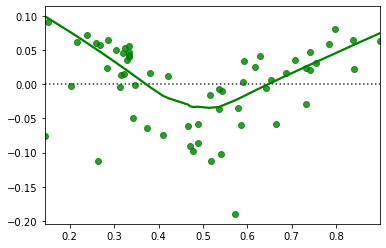

In [61]:
sn.residplot(x=y_pred, y=residual, lowess=True, color="g")

<h3>Q-Q plot

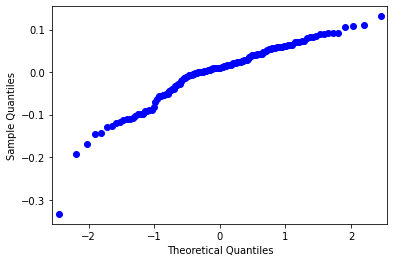

In [62]:
import matplotlib.pyplot as plt

res = results.resid
fig = sm.qqplot(res)
plt.show()